# Cluster 2018

# clase_01: Importar data, describirla y visualizarla.

En esta segunda clase aprenderemos a realizar correlaciones lineales de Pearson, visualizar boxplots, comprender los quantiles de un set de datos y eliminar outliers observando que quantil (percentil) nos ayuda a filtrar. Primero haremos un repaso sobre el analisis exploratorio de subtes que realizamos la semana pasada. 

**Importamos las Librerías necesarias:** Utilizaremos Numpy para realizar calculos matriciales, pandas para manejar los datos y almacenarlos, y matplotlib junto con Seaborn para visualizar.

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


**Read_CSV:** Descargamos de https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes el dataset de usuarios de subte por molinete del año 2017. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido. Una vez leido guardamos la tabla como un DataFrame de Pandas en el elemento "molinetes". 

In [2]:
# importante detallar que el delimiter indica como estan separadas las columnas en el dataframe.
molinetes = pd.read_csv('/home/human/Dropbox/clusterai/molinetes_historico.csv', delimiter=';')

con el comando .head() observamos las primeras 5 filas de nuestro dataframe

In [3]:
# con el comando .head() podemos ver en pantalla las primeras filas y del dataframe
molinetes.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,1,0,0,1,1
1,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN02,CASEROS,1,0,0,1,1
2,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,2,0,0,2,1
3,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN01,CASEROS,1,0,0,1,1
4,201701,01/01/2017,08:30:00,08:45:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN01,CASEROS,2,0,0,2,1


Recordemos que el comando de numpy np.shape() nos indica las dimensiones de nuestro elemento, en este caso un dataframe de pandas.

In [4]:
# si queremos saber cuantos renglones y columnas tiene el objeto en cuestion, utilizamos el comando de numpy "shape".
# asi podemos ver que nuestro dataset posee mas de 11 millones de renglones y 12 columnas
np.shape(molinetes)

(11938476, 12)

In [5]:
# Imprimimos en pantalla un breve reporte de un renglón sobre las dimensiones de nuestro dataframe.
# Ver que utilizamos la función de numpy "shape".
print("El dataset importado tiene "+ str(np.shape(molinetes)[0]) + " renglones y " + str(np.shape(molinetes)[1]) + " columnas")

El dataset importado tiene 11938476 renglones y 12 columnas


Si bien en nuestro dataset de subtes no existen columnas que tengan valores nulos o faltantes (NaNs) es necesario entender para otros datasets si hay valores faltantes para eliminarlos (o reemplazarlos por otro valor como la mediana).

In [6]:
# revisamos si existen columnas que contengan valores faltantes (NaNs)
col_nulls = molinetes.isnull().any()
col_nulls

PERIODO            False
FECHA              False
DESDE              False
HASTA              False
LINEA              False
MOLINETE           False
ESTACION           False
PAX_PAGOS          False
PAX_PASES_PAGOS    False
PAX_FRANQ          False
TOTAL              False
ID                 False
dtype: bool

# Columnas e Indices en Pandas

**Columnas e Indices en Pandas:** los dataframes de pandas se caracterizan por tener nombres explícitos por columna y por renglón (indice). Es decir que podemos llamar a un elemento (o varios) de un DataFrame por el nombre de su columna e índice.

In [7]:
# Obtenemos los nombres de las columnas del dataframe Molinetes
columnas_molinetes = molinetes.columns
columnas_molinetes

Index(['PERIODO', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [8]:
# Obtenemos los nombres de los índices (renglones o instancias) del dataframe Molinetes.
# Observamos que cuando imprimimos en pantalla los índices, fueron definidos al importar el csv con el parametro 
# "index_col" seleccionando la columna "PERIODO".
instancias_molinetes = molinetes.index
instancias_molinetes

RangeIndex(start=0, stop=11938476, step=1)

# Filtrar un dataframe por el valor de una columna

**Filtrar un dataframe por el valor de una columna:** Inicialmente filtraremos nuestro dataframe "molinetes_b" por el valor "LINEA_B" de la columna "LINEA". Para eso usamos la funcion ".loc" de pandas, sobre el dataframe.

In [9]:
# como inicialmente queremos trabajar con los datos de la Linea B, filtramos por el valor "LINEA_B" de la columna
# "LINEA" nuestro dataframe original llamado molinetes.
molinetes_b = molinetes.loc[molinetes['LINEA'] == 'LINEA_B']

In [10]:
# observamos que la cantidad de renglones del nuevo dataframe es menor al del original, puesto que solo 
# estamos considerando a los molinetes de la linea B
np.shape(molinetes_b)

(2855204, 12)

In [75]:
molinetes_b.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
2492243,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN01,FLORIDA,4,0,0,4,20
2492244,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN03,FLORIDA,3,0,0,3,20
2492245,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN02,FLORIDA,1,0,0,1,20
2492246,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20
2492247,201701,01/01/2017,08:15:00,08:30:00,LINEA_B,LINEA_B_FLORIDA_O_TURN01,FLORIDA,2,0,0,2,20


# Visualizacion: Countplot

Visualización Countplot de Seaborn para las distintas lineas de subte.

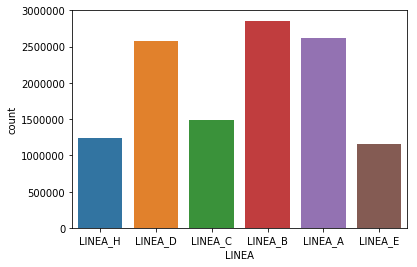

In [89]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "LINEA"
az = sns.countplot(x="LINEA", data=molinetes)
plt.show()

Visualización de Countplot de Seaborn para las distintas estaciones de la linea B.

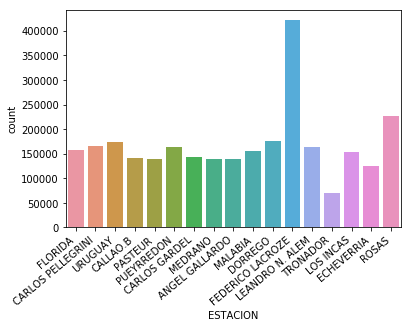

In [90]:
# luego generamos un countplot de seaborn por la columna estación, esta vez utilizando el nuevo dataframe filtrado
# molinetes_b, que solo contiene los datos de la linea B.
ax = sns.countplot(x="ESTACION", data=molinetes_b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Visualizacion: Boxplot con Seaborn para linea B
Procedemos a realizar un boxplot por cada estacion, cuantificando asi donde se concentran cada lapso de tiempo en viajes de molinete. Ver que siempre la cantidad de periodos de 15 mins entre el 1er y 3er cuartil esta por debajo de 100 viajes. Es importante comprender la diferencia entre el boxplot visualizado a continuacion y el countplot visualizado en el paso anterior. ¿Que cambia entre uno y otro?

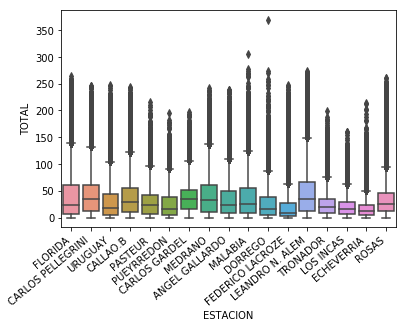

In [99]:
ay = sns.boxplot(x = molinetes_b.ESTACION, y = molinetes_b.TOTAL, data = molinetes_b)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Test Estadistico: Mann Whitney entre dos muestras
Este test se aplica a dos muestras consideradas independientes. Su objetivo es tener algun indicador que marque si ambas muestras vienen de igual poblacion o no. Como todo test estadistico, existe una hipotesis nula y una hipotesis alternativa. En este caso la hipotesis nula H0 = Ambas muestras pertenecen a poblaciones de igual media. Si el P valor obtenido es menor a 0.05, estamos en condiciones de decir que tenemos suficiente evidencia para rechazar la hipotesis nula y afirmar que ambas muestras vienen de poblaciones con distintas medias.
El P valor es una medida de probabilidad que indica cual es la chance de que las hipotesis nula se rechaze solo por azar. Obviamente cuanto menor sea el P valor mas fuerte es la evidencia para rechazar la H0. Por convencion, todo p valor menor a 0.05 se dice que es estadisticamente significativo.
Ver https://es.wikipedia.org/wiki/Prueba_U_de_Mann-Whitney

In [193]:
medrano_carlosgardel = molinetes_b.loc[(molinetes_b.ESTACION == "MEDRANO") | (molinetes_b.ESTACION == "CARLOS GARDEL")]
medrano_carlosgardel.tail()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
11938402,201712,31/12/2017,22:00:00,22:15:00,LINEA_B,LINEA_B_MEDRANO_N_TURN01,MEDRANO,4,0,0,4,27
11938403,201712,31/12/2017,22:00:00,22:15:00,LINEA_B,LINEA_B_MEDRANO_N_TURN04,MEDRANO,0,0,1,1,27
11938404,201712,31/12/2017,22:00:00,22:15:00,LINEA_B,LINEA_B_MEDRANO_S_TURN02,MEDRANO,1,0,1,2,27
11938431,201712,31/12/2017,22:00:00,22:15:00,LINEA_B,LINEA_B_MEDRANO_N_TURN02,MEDRANO,6,0,0,6,27
11938432,201712,31/12/2017,22:00:00,22:15:00,LINEA_B,LINEA_B_MEDRANO_S_TURN01,MEDRANO,3,0,0,3,27


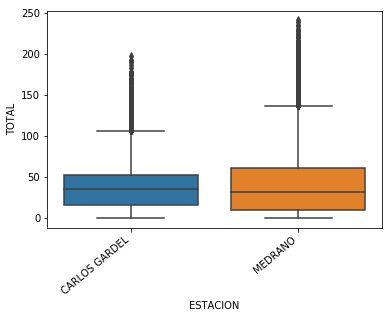

In [194]:
ay = sns.boxplot(x = medrano_carlosgardel.ESTACION, y = medrano_carlosgardel.TOTAL, data = medrano_carlosgardel)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.show()

Realizamos el mann whitney test entre las columnas TOTAL de las filas que son == MEDRANO y las que son == CARLOS GARDEL. Si el p-value obtenido es <0.05 entonces decimos que existe suficiente evidencia para rechazar la Hipotesis Nula H0. La H0 implica que las muestras provienen de poblaciones con medias iguales o similares. Si el p value obtenido es > 0.05 entonces decimos que no tenemos suficiente evidencia para rechazar la hipotesis nula. OJO! esto no quiere decir que la hipotesis nula es valida, solo podemos afirmar que no podemos rechazarla.

In [201]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
#mannwhitney between CS and Tumor labels within train set
pvalue = (mannwhitneyu(np.array(medrano_carlosgardel.loc[medrano_carlosgardel.ESTACION == "MEDRANO"].TOTAL),np.array(medrano_carlosgardel.loc[medrano_carlosgardel.ESTACION == "CARLOS GARDEL"].TOTAL))[1])
pvalue

0.0002258286288233322

# Análisis de la estación Lacroze de la linea B
Creamos un dataframe llamado "molinetes_lacroze" que contiene unicamente las instancias del dataframe "molinetes_b" cuyo valor del atributo/feature "ESTACION" sea igual a "FEDERICO LACROZE"

In [202]:
# filtramos con ".loc" el dataframe "molinetes_b" por el valor "Federico Lacroze" de la columna "Estacion"
molinetes_lacroze = molinetes_b.loc[molinetes_b.ESTACION== 'FEDERICO LACROZE']

In [203]:
molinetes_lacroze.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
7622359,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN09,FEDERICO LACROZE,2,0,0,2,66
7622360,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN05,FEDERICO LACROZE,4,0,0,4,66
7622361,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN06,FEDERICO LACROZE,0,0,1,1,66
7622362,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN03,FEDERICO LACROZE,1,0,0,1,66
7622363,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN07,FEDERICO LACROZE,2,0,0,2,66


**estadisticas descriptivas para la columna "TOTAL" del dataframe "molinetes_lacroze"**

In [204]:
molinetes_lacroze['TOTAL'].describe()

count    421233.000000
mean         19.292629
std          25.177922
min           0.000000
25%           3.000000
50%           9.000000
75%          27.000000
max         248.000000
Name: TOTAL, dtype: float64

**distplot para la columna "TOTAL" del dataframe "molinetes_lacroze"**

/home/human/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/human/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


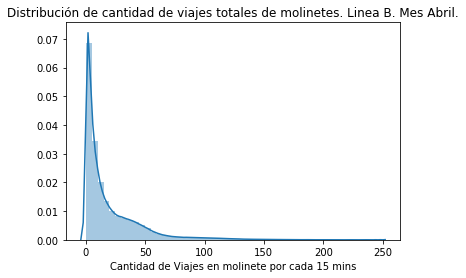

In [205]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
sns.distplot(molinetes_lacroze['TOTAL'])
plt.title('Distribución de cantidad de viajes totales de molinetes. Linea B. Mes Abril.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

**Boxplot para la columna TOTAL del dataframe "molinetes_lacroze"**
Realizaremos un boxplot con Matplotlib y otro con seaborn, simplemente para aprender que existen 2 maneras de visualizar.

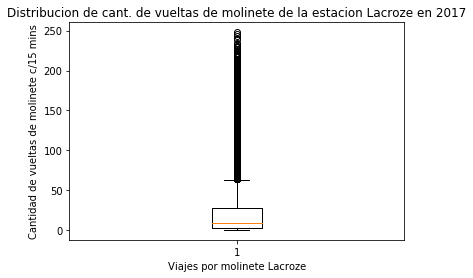

In [206]:
# boxplot realizado con Matplotlib
plt.boxplot(molinetes_lacroze['TOTAL'])
plt.title('Distribucion de cant. de vueltas de molinete de la estacion Lacroze en 2017')
plt.ylabel('Cantidad de vueltas de molinete c/15 mins')
plt.xlabel("Viajes por molinete Lacroze")
plt.show()

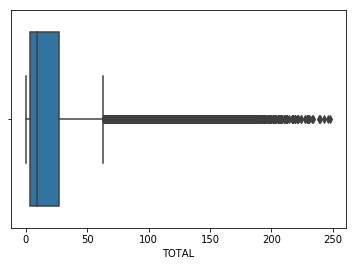

In [207]:
ax = sns.boxplot(x = "TOTAL", data =  molinetes_lacroze)
plt.show()

# Filtrado de outliers con cuantiles
Calculamos el valor del percentil 90. Lo que este sobre el percentil 90 lo llamaremos "hora pico" y lo que este por debajo sera "hora no pico".

Con el comando de pandas .quantile() calculamos los percentiles que deseemos. En algunos casos nos puede llegar a interesar tambien observar lo que se encuentre por debajo del percentil 10, aunque como observamos en el distplot, la distribucion es asimetrica a la derecha.

In [208]:
# calculo el percentil 90 de la columna "TOTAL" para el dataframe "molinetes_lacroze".
percentil_90 = molinetes_lacroze['TOTAL'].quantile(0.9)

In [209]:
percentil_90

50.0

Ahora filtramos por los valores de "TOTAL" que sean mayores al percentil 90 para guardarlos en otro dataframe llamado "Lacroze_hora_pico". Lo mismo hacemos para los que son menores al percentil 90 y los guardamos como "hora no pico".

In [210]:
lacroze_hora_pico = molinetes_lacroze.loc[molinetes_lacroze['TOTAL']>percentil_90]

In [211]:
lacroze_hora_nopico = molinetes_lacroze.loc[molinetes_lacroze['TOTAL']<percentil_90]

Observamos que la expresion **"molinetes_lacroze['TOTAL']<percentil_90"** es un vector Boolean, es decir que arroja True o False, y al filtrar utilizando un vector boolean solo sobreviven las filas que esten asociadas a un True.

In [212]:
# observamos que cuando indicamos una expresion logica, lo que devuelve python son valores Booleanos como True or False.
(molinetes_lacroze['TOTAL']<percentil_90).head()

7622359    True
7622360    True
7622361    True
7622362    True
7622363    True
Name: TOTAL, dtype: bool

In [213]:
# observamos que dimensiones tienen ahora los dataframes de hora pico y hora no pico
np.shape(lacroze_hora_nopico)

(378809, 12)

In [214]:
np.shape(lacroze_hora_pico)

(40621, 12)

Ploteamos la distribucion / histograma de la hora pico

/home/human/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/human/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


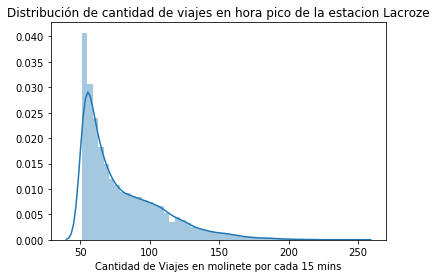

In [215]:
sns.distplot(lacroze_hora_pico['TOTAL'], norm_hist = False)
plt.title('Distribución de cantidad de viajes en hora pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

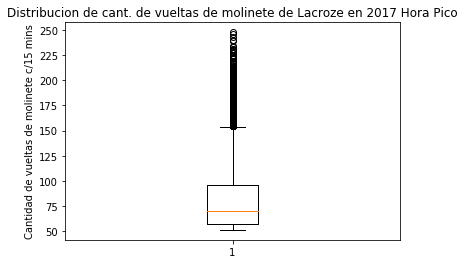

In [217]:
plt.boxplot(lacroze_hora_pico['TOTAL'])
plt.title('Distribucion de cant. de vueltas de molinete de Lacroze en 2017 Hora Pico')
plt.ylabel('Cantidad de vueltas de molinete c/15 mins')
plt.show()

Calculamos estadisticas descriptivas para la hora pico

In [216]:
lacroze_hora_pico['TOTAL'].describe()

count    40621.000000
mean        80.194604
std         28.975506
min         51.000000
25%         57.000000
50%         70.000000
75%         96.000000
max        248.000000
Name: TOTAL, dtype: float64

Ahora calculamos estadisticas descriptivas y graficos para la hora no pico

In [221]:
lacroze_hora_nopico['TOTAL'].describe()

count    378809.000000
mean         12.615743
std          12.964954
min           0.000000
25%           2.000000
50%           7.000000
75%          19.000000
max          49.000000
Name: TOTAL, dtype: float64

/home/human/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/human/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


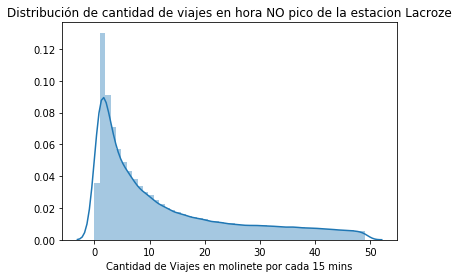

In [222]:
sns.distplot((lacroze_hora_nopico['TOTAL']))
plt.title('Distribución de cantidad de viajes en hora NO pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

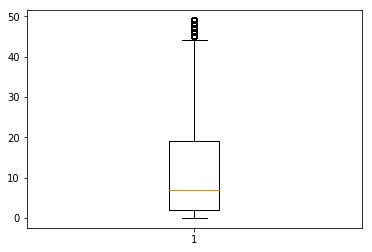

In [223]:
plt.boxplot(lacroze_hora_nopico['TOTAL'])
plt.show()

/home/human/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


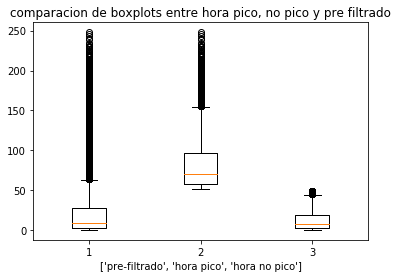

In [224]:
plt.boxplot([molinetes_lacroze['TOTAL'],lacroze_hora_pico['TOTAL'], lacroze_hora_nopico['TOTAL']])
plt.title('comparacion de boxplots entre hora pico, no pico y pre filtrado')
plt.xlabel(['pre-filtrado', 'hora pico', 'hora no pico'])
plt.show()

# Correlación Lineal entre estaciones Linea C

\begin{equation}
r = \frac{\sum_{i}^{n}\left ( x_i - \overline{x} \right )\left ( y_i - \overline{y}  \right )}{\left [ \sum_{i}^{n} \left ( x_i - \overline{x}  \right )^{2} \left ( y_i - \overline{y} \right ) ^{2}  \right ]^{1/2}}
\end{equation}

La correlacion lineal (Pearson) es un indicador que varia entre -1 y 1. Indica si dos variables supuestas independientes, se comportan linealmente una de la otra al analizalas juntas. Correlacion r>0 implica correlacion lineal positiva y r<0 implica correlacion lineal negativa. Si r=0 quiere decir que no existe correlacion LINEAL, aunque puede existir otro tipo de correlacion no lineal.

**IMPORTANTE: Correlacion no implica causalidad**. Si dos variables estan altamente correlacionadas, nada indica que una es la causa de la otra, es decir, nada indica que una depende de otra.

In [225]:
# Creamos un dataframe solo de la linea C filtrando el dataframe "molinetes" por la columna "LINEA"
molinetes_c = molinetes[(molinetes['LINEA'] == 'LINEA_C')]

In [226]:
# ahora creamos una tabla pivote para resumir por columnas ESTACION y filas FECHA, los valores de cantidad de viajes
# de molinetes para la linea C
molinetes_c_pivot = pd.pivot_table(molinetes_c, values = 'TOTAL', columns = 'ESTACION', index = 'PERIODO',fill_value=0, aggfunc = np.sum)

In [227]:
# observamos como quedo la tabla pivote
molinetes_c_pivot.head()

ESTACION,AVENIDA DE MAYO,CONSTITUCION,DIAGONAL NORTE,GENERAL SAN MARTIN,INDEPENDENCIA,LAVALLE,MARIANO MORENO,RETIRO,SAN JUAN
PERIODO,,,,,,,,,
201701,106068,8229,88541,135184,195139,118027,110087,511180,705
201702,102016,1,92249,137498,228300,117724,124408,517505,0
201703,179735,1673294,180484,276231,188051,278616,219070,1016705,155478
201704,147947,1674946,152623,233642,161896,244432,184197,941852,157027
201705,173288,1973564,178884,280895,178144,290885,217205,1105674,179406


In [228]:
# ahora generamos una matriz de correlacion de Pearson entre cada estacion de la linea C.
# Con esto queremos entender si cuando aumenta o diminuye los viajes de molinetes de una estacion, el resto de las estaciones
# evoluciona directa o indirectamente proporcional de manera lineal.
mol_c_corr = molinetes_c_pivot.corr()

In [229]:
# observamos las dimensiones de esta matriz
np.shape(mol_c_corr)

(9, 9)

In [230]:
# visualizamos las primeras 3 filas de la matriz
mol_c_corr.head(3)

ESTACION,AVENIDA DE MAYO,CONSTITUCION,DIAGONAL NORTE,GENERAL SAN MARTIN,INDEPENDENCIA,LAVALLE,MARIANO MORENO,RETIRO,SAN JUAN
ESTACION,,,,,,,,,
AVENIDA DE MAYO,1.000000,0.944188,0.992863,0.981723,-0.457787,0.976326,0.988167,0.969090,0.957276
CONSTITUCION,0.944188,1.000000,0.954917,0.960572,-0.619212,0.982128,0.968479,0.993509,0.985945
DIAGONAL NORTE,0.992863,0.954917,1.000000,0.991764,-0.498654,0.987925,0.989611,0.975702,0.975865


# Heatmap de correlacion estaciones linea C
Utilizamos la funcion Heatmap de seaborn para visualizar la matriz de correlacion que generamos en el paso anterior. Observamos que la estacion Independencia correlaciona negativamente con el resto. Esto quiere decir que cuando el resto de las estaciones incrementa su numero de pasajeros por molinete, en Independencia decrece demanera lineal.

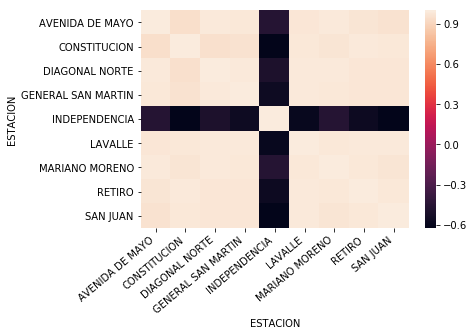

In [231]:
corr_c_plot = sns.heatmap(mol_c_corr, xticklabels=1, yticklabels=1)
corr_c_plot.set_xticklabels(corr_c_plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

Observamos que la estacion Independencia correlaciona negativamente con respecto al resto de las estaciones. Posiblemente sea un efecto de que Independencia es un nodo que intersecta a la linea E.

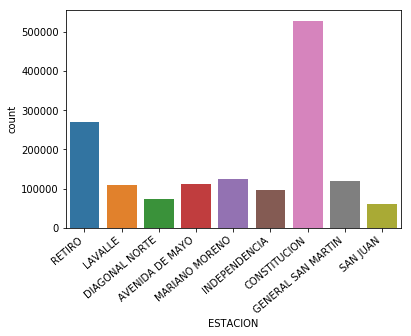

In [232]:
count_c_plot = sns.countplot(molinetes_c['ESTACION'])
count_c_plot.set_xticklabels(count_c_plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [233]:
molinetes_c_ind_cons = molinetes_c[(molinetes_c['ESTACION'] == 'INDEPENDENCIA') | (molinetes_c['ESTACION'] == 'RETIRO')  ]
molinetes_c_ind_cons.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1296430,201701,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_RETIRO_TURN01,RETIRO,1,0,0,1,13
1296431,201701,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_RETIRO_TURN11,RETIRO,9,0,1,10,13
1296432,201701,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_RETIRO_TURN12,RETIRO,4,0,0,4,13
1296433,201701,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_RETIRO_TURN04,RETIRO,0,0,1,1,13
1296434,201701,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_RETIRO_TURN09,RETIRO,5,0,1,6,13


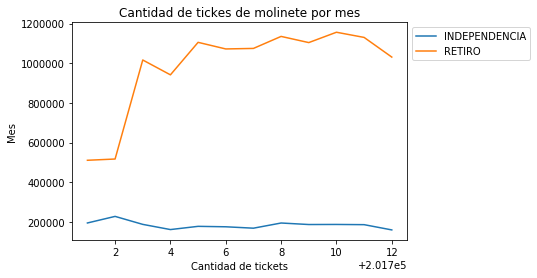

In [234]:
plt.plot(molinetes_c_pivot.index, molinetes_c_pivot['INDEPENDENCIA'], label='INDEPENDENCIA');
plt.plot(molinetes_c_pivot.index, molinetes_c_pivot['RETIRO'], label='RETIRO');
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Cantidad de tickes de molinete por mes')
plt.xlabel('Cantidad de tickets')
plt.ylabel('Mes')
plt.show()